Task: Analyze customer churn rate and identify factors that contribute to it

Objective: Identify the factors that are most closely associated with customer churn

Collect --------------------------------------------------------------------------------

In [20]:
import pandas as pd

# Collect
df = pd.read_csv('E:\\Visualstudio\\Data_analysis_projects\\Bank_customers_churn\\Resources\\Churn Modeling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Analyze -----------------------------------------------------------------------------------

In [17]:
import pandas as pd

# Collect
df = pd.read_csv('E:\\Visualstudio\\Data_analysis_projects\\Bank_customers_churn\\Resources\\Churn Modeling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Count the number of values in the column IsActiveMember to know the churns

In [19]:
import pandas as pd

# Collect
df = pd.read_csv('E:\\Visualstudio\\Data_analysis_projects\\Bank_customers_churn\\Resources\\Churn Modeling.csv')

# count the number of 1's and 0's in the 'IsActiveMember' column
counts = df['IsActiveMember'].value_counts()

counts

1    5151
0    4849
Name: IsActiveMember, dtype: int64

how many 0 and 1 are in Spain,Germany and France 

In [42]:
import pandas as pd

# Collect
df = pd.read_csv('E:\\Visualstudio\\Data_analysis_projects\\Bank_customers_churn\\Resources\\Churn Modeling.csv')

# groups the df DataFrame by the Geography column, calculates the sum and count of IsActiveMember, resets the index, and renames the columns to Sum and Count, respectively.
rename = df.groupby('Geography')['IsActiveMember'].agg(['sum', 'count']).reset_index().rename(columns={'sum': 'Sum', 'count': 'Count'})

# creates a new column called Difference and calculates the difference between the Count and Sum columns for each row in the DataFrame.
rename['Difference'] = rename['Count'] - rename['Sum']

rename


,Geography,Sum,Count,Difference
0,France,2591,5014,2423
1,Germany,1248,2509,1261
2,Spain,1312,2477,1165


Share ------------------------------------------------------------------------------------

Geography and Tenure graph

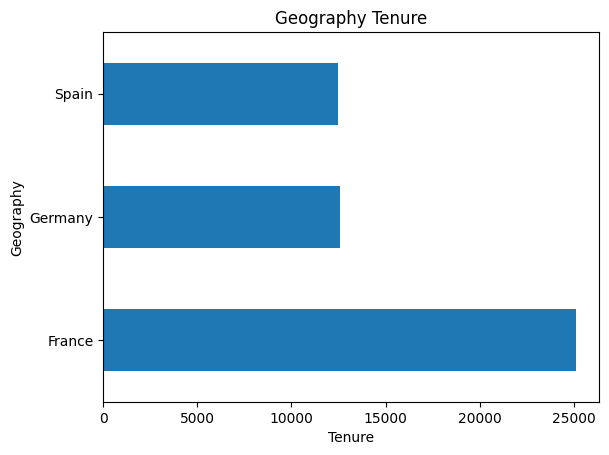

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect
df = pd.read_csv('E:\\Visualstudio\\Data_analysis_projects\\Bank_customers_churn\\Resources\\Churn Modeling.csv')

# group by Geography and sum Tenure
grouped = df.groupby('Geography')['Tenure'].sum()

# create a bar graph
grouped.plot(kind='barh')



# add title and axis labels
plt.title('Geography Tenure')
plt.xlabel('Tenure')
plt.ylabel('Geography')

# rotate x-axis labels for better visibility
#plt.xticks(rotation=0)

# display the plot
plt.show()

Geography and IsActiveMember graph

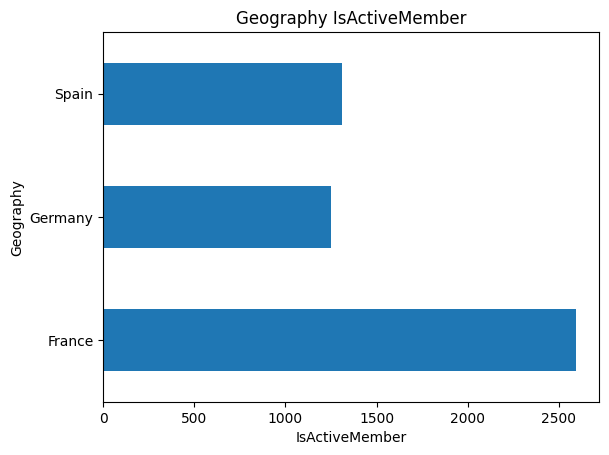

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect
df = pd.read_csv('E:\\Visualstudio\\Data_analysis_projects\\Bank_customers_churn\\Resources\\Churn Modeling.csv')

# group by Geography and sum Tenure
grouped = df.groupby('Geography')['IsActiveMember'].sum()

# create a bar graph
grouped.plot(kind='barh')
 
 
 
# add title and axis labels
plt.title('Geography IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Geography')

# rotate x-axis labels for better visibility
#plt.xticks(rotation=0)

# display the plot
plt.show()

Geography and IsActiveMember graph to know churn by geography

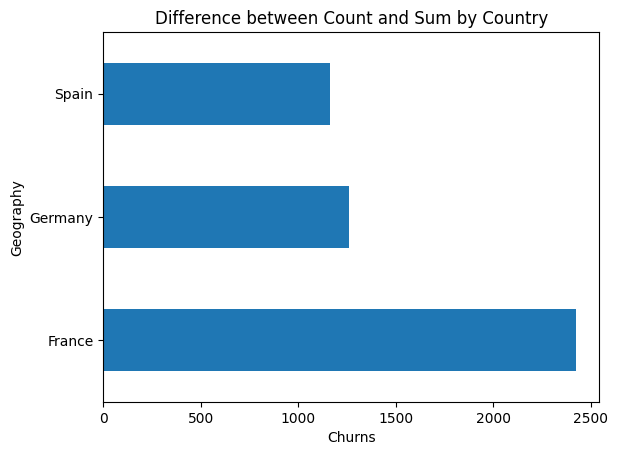

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect
df = pd.read_csv('E:\\Visualstudio\\Data_analysis_projects\\Bank_customers_churn\\Resources\\Churn Modeling.csv')

# groups the df DataFrame by the Geography column, calculates the sum and count of IsActiveMember, resets the index, and renames the columns to Sum and Count, respectively.
grouped = df.groupby('Geography')['IsActiveMember'].agg(['sum', 'count']).reset_index().rename(columns={'sum': 'Sum', 'count': 'Count'})

# creates a new column called Difference and calculates the difference between the Count and Sum columns for each row in the DataFrame.
grouped['Difference'] = grouped['Count'] - grouped['Sum']


# Select only the Geography and Difference columns from the DataFrame
df_plot = grouped[['Geography', 'Difference']]

# Set the Geography column as the index
df_plot.set_index('Geography', inplace=True)

# Create a horizontal bar chart of the Difference column
ax = df_plot['Difference'].plot(kind='barh')

# Set the x-axis label and title
ax.set_xlabel('Churns')
ax.set_title('Difference between Count and Sum by Country')

# Display the plot
plt.show()

Correlation matrix graph

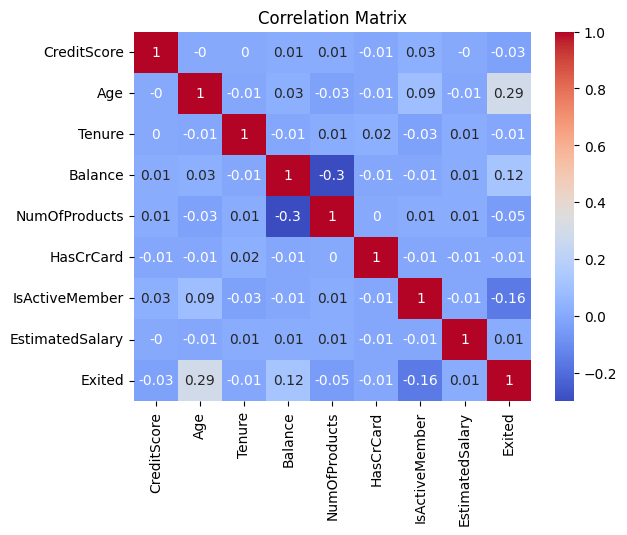

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Collect
df = pd.read_csv('E:\\Visualstudio\\Data_analysis_projects\\Bank_customers_churn\\Resources\\Churn Modeling.csv')

# drop the 'RowNumber' and 'CustomerId' columns
df = df.drop(['RowNumber', 'CustomerId'], axis=1)

# create a correlation matrix
corr_matrix = df.corr(numeric_only=True)

# round the values to 2 decimal places
corr_matrix = corr_matrix.round(2)

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# add title
plt.title('Correlation Matrix')

# display the plot
plt.show()


Correlation can be either positive or negative. Positive correlation means that when one variable increases, the other variable tends to increase as well. Negative correlation means that when one variable increases, the other variable tends to decrease.

Churn rate

In [21]:
# Total customers
print(f'Total customers: 10,000')

# Total churns
print(f'Total churns: 4849')

# churn_rate = number_of_customers_who_have_churned / total_number_of_customers
churn_rate = (4849 / 10000)
print(f'The churn rate is: {churn_rate}')

# churn percentage
churn_percentage = churn_rate*100
print(f'The churn percentage is: {churn_percentage}%')

Total customers: 10,000
Total churns: 4849
The churn rate is: 0.4849
The churn percentage is: 48.49%
